## **Module G2: Numerical Integration-continued**

**Simpson's Rule:** Consider two consecutive subintervals, [$x_\mathrm{i-1}$,$x_\mathrm{i}$] and [$x_\mathrm{i}$,$x_\mathrm{i+1}$]. Simpson’s Rule approximates the area under 𝑓(𝑥) over these two subintervals by fitting a quadratic polynomial through the points $(x_\mathrm{i-1},f(x_\mathrm{i-1}))$,$(x_\mathrm{i},f(x_\mathrm{i}))$, and $(x_\mathrm{i+1},f(x_\mathrm{i+1}))$, which is a unique polynomial, and then integrating the quadratic exactly. 
$$
\int _a^{b} f(x)dx \approx\frac{h}{3}[f(x_\mathrm{0}) + 4(\sum _ {i=1, i odd}^{n-1}f(x_\mathrm{i})) + 2 (\sum _ {i=2, i even}^{n-2}f(x_\mathrm{i}))+f(x_\mathrm{n})]
$$


**example**:Use Simpson’s Rule to approximate $\int _0^{𝜋}sin(𝑥)𝑑𝑥$  with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2. 

In [1]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


**Conclusion**: the accuracy is greatly improved by Simpson's Rule

**Computing Integrals in Python:**The **𝑠𝑐𝑖𝑝𝑦.𝑖𝑛𝑡𝑒𝑔𝑟𝑎𝑡𝑒** sub-package has several functions for computing integrals. The **𝑡𝑟𝑎𝑝𝑧** takes as input arguments an array of function values 𝑓 computed on a numerical grid 𝑥.

**Example:** Use the 𝑡𝑟𝑎𝑝𝑧 function to approximate $\int _0^{𝜋}sin(𝑥)𝑑𝑥$ for 11 equally spaced points over the whole interval. Compare this value to the one computed in the early example using the Trapezoid Rule.

In [2]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


**Example** Sometimes we want to know the approximated cumulative integral. That is, we want to know $F(X)=
\int_{x_\mathrm{0}}^{X} f(x)dx \,
$. For this purpose, it is useful to use the **𝑐𝑢𝑚𝑡𝑟𝑎𝑝𝑧** function **𝑐𝑢𝑚𝑠𝑢𝑚**, which takes the same input arguments as 𝑡𝑟𝑎𝑝𝑧.
Use the 𝑐𝑢𝑚𝑡𝑟𝑎𝑝𝑧 function to approximate the cumulative integral of 𝑓(𝑥)=sin(𝑥) from 0 to 𝜋 with a discretization step of 0.01. The exact solution of this integral is 𝐹(𝑥)=𝑠𝑖𝑛(𝑥). Plot the results.

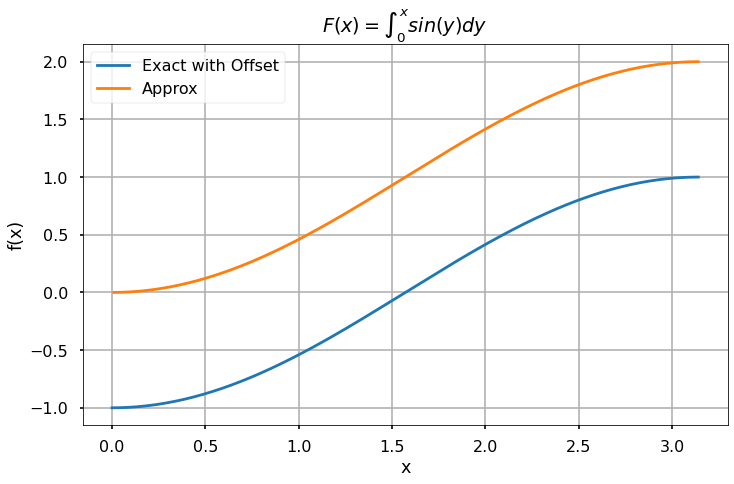

In [3]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The **𝑞𝑢𝑎𝑑(𝑓,𝑎,𝑏)** function uses a different numerical differentiation scheme to approximate integrals. 𝑞𝑢𝑎𝑑 integrates the function defined by the function object, 𝑓, from 𝑎 to 𝑏.

Example:Use the 𝑖𝑛𝑡𝑒𝑔𝑟𝑎𝑡𝑒.𝑞𝑢𝑎𝑑 function to compute $\int _0^{𝜋}sin(𝑥)𝑑𝑥$ . Compare your answer with the correct answer of 2.



In [4]:
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0


### **Exercise**

**Exercise (1):** Write a function my_simp_int($f, a, b, n$), where the output 𝐼 is the numerical integral of $f$, a function object, computed on computed on a grid of $n$ evenly spaced points starting at $a$ and ending at $b$.  You may assume that $n$ is odd. Warning: In the reader, the 𝑥 subscripts start at 𝑥0 not 𝑥1; take note of this when programming your loops. The odd-even indices will be reversed. Also the $N$ term given in Simpsons Rule denotes the number of subintervals, not the number of points as specified by the input argument, 𝑛.

In [5]:
import numpy as np
def my_simp_int(f, a, b, n):
    if n % 2 == 0:
        raise ValueError("N must be a odd integer.")
    h = (b-a)/(n-1)
    x = np.linspace(a, b, n)
    y = f(x)
    I= h/3*np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
 
    return I


In [6]:
f = lambda x: x**2
my_simp_int(f, 0, 1, 3)

0.3333333333333333

In [7]:
f = lambda x: np.exp(x**2)
my_simp_int(f, -1, 1, 101)


2.9253035883926497

In [8]:
f = lambda x: np.exp(x**2)
my_simp_int(f, -1, 1, 10001)

2.9253034918143648

In [9]:
f = lambda x: np.exp(x**2)
my_simp_int(f, -1, 1, 100001)

2.9253034918143643

**Exercise (2)** The function scipy.integrate.simps computes the approximation of a definite integral by Simpson's rule. Use scipy.integrate.simps to approximate the integral of the functions in exercise $f(x) = e^{x^2}$

In [10]:
import scipy.integrate as spi
import numpy as np

n = 100
a = -1
b = 1
x = np.linspace(a, b, n+1)
y = np.exp(x**2)

approximation = spi.simps(y,x)
print(approximation)

2.9253035883926493


**Exercise (3):**Some functions, particularly periodic functions, can be written as an infinite sum of sine and cosine waves. For these functions,

$$𝑓(𝑥)=\frac{𝐴_\mathrm{02}}{2}+\sum _ {n=1}^{∞}𝐴_\mathrm{n}cos(𝑛𝑥) + B_\mathrm{n} sin(𝑛𝑥) $$
It can be shown that the values of 𝐴𝑛 and 𝐵𝑛 can be computed using the following formulas:

$$ 𝐴_\mathrm{n} = \frac{1}{𝜋}\int_{-𝜋}^{𝜋} f(x)cos(𝑛𝑥)dx 
$$

$$ B_\mathrm{n} = \frac{1}{𝜋}\int_{-𝜋}^{𝜋} f(x)sin(𝑛𝑥)dx 
$$

Just like Taylor series, functions can be approximated by truncating the Fourier series at some 𝑛=𝑁. Fourier series can be used to approximate some particularly nasty functions such as the step function, and they form the basis of many engineering applications such as signal processing.

Write a function my_fourier_coef($f,n$) , with output [$ 𝐴_\mathrm{n}, B_\mathrm{n} $], where $f$ is an function object that is 2𝜋-periodic. The function my_fourier_coef should compute the $n$-th Fourier coefficients, $ 𝐴_\mathrm{n}$ and $ B_\mathrm{n}$, in the Fourier series for 𝑓 defined by the two formulas given earlier. You should use the 𝑞𝑢𝑎𝑑 function to perform the integration.



In [11]:
from scipy.integrate import quad 
import numpy as np

def my_fourier_coef(f, n):
  x = np.linspace(-np.pi, np.pi, 10000)

  fc=lambda x:f(x)*np.cos(n*x)
  fs=lambda x:f(x)*np.sin(n*x)
  An=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
  Bn=quad(fs,-np.pi,np.pi)[0]*(1.0/np.pi)

  return [An, Bn]


In [12]:
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0*np.ones(len(x))/2
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()
   


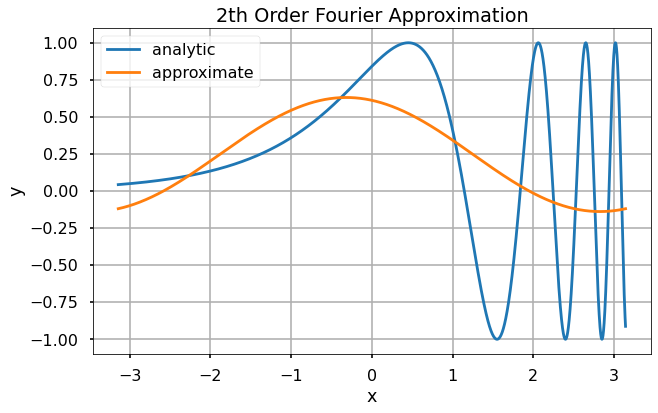

In [13]:
f = lambda x: np.sin(np.exp(x))
N = 2
plot_results(f, N)


 

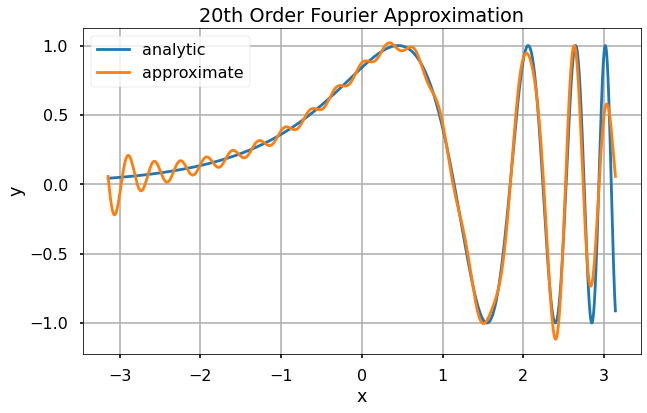

In [14]:
f = lambda x: np.sin(np.exp(x))
N = 20
plot_results(f, N)

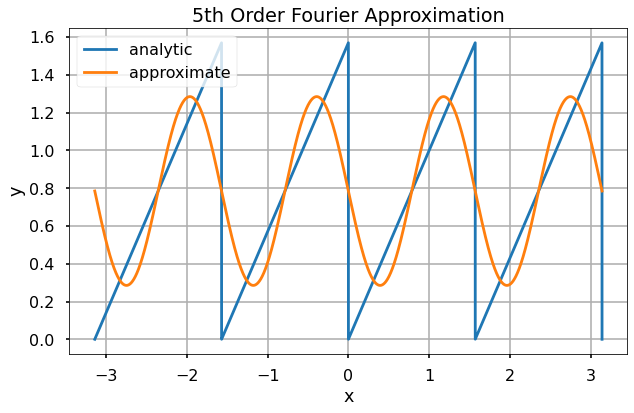

In [15]:
 f = lambda x: np.mod(x, np.pi/2)
 N = 5
 plot_results(f, N)

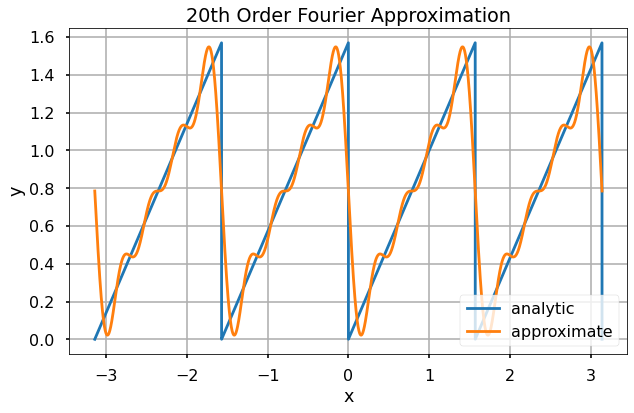

In [16]:
 f = lambda x: np.mod(x, np.pi/2)
 N = 20
 plot_results(f, N)

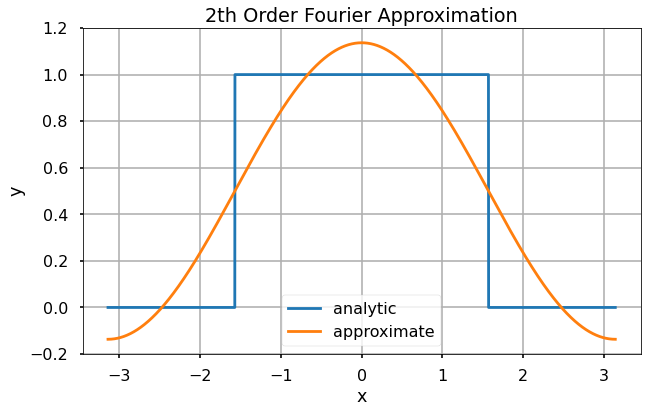

In [17]:
 f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
 N = 2
 plot_results(f, N)

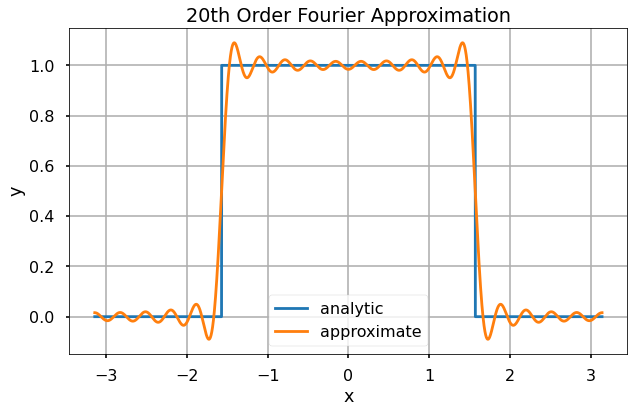

In [18]:
 f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
 N = 20
 plot_results(f, N)